# INF552 Assignment6 Support Vector Machines -- Part1
### Tong Lyu 1076139647
## 1 Introduction
### 1.1 Libraries

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import heapq

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy.spatial import distance

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve,auc
from sklearn.calibration import CalibratedClassifierCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## 2. Supervised, Semi-Supervised, and Unsupervised Learning
### 2.1 Supervised Learning (1b i)

In [2]:
#1a import data
input_data = pd.read_csv("./data/wdbc.data", sep=",",header=None).drop([0],axis=1)
input_data.sort_values([1],inplace=True)
input_data = input_data.reset_index(drop=True)
input_data = input_data.replace('B',1)
input_data = input_data.replace('M',0)

penalties = list(10**exp for exp in range(-3,6))
M = 30

#Unsupervised learning && Spectural clustering
number_of_points = 30

In [3]:
def conf_mtx(true, prediction):
    matrix = confusion_matrix(true, (prediction>0.5).astype(int))
    TP = matrix[1][1]
    FP = matrix[0][1]
    TN = matrix[0][0]
    FN = matrix[1][0]
    print("\t\t| predicted Benign\t| predicted Malignant")
    print("real Benign\t| "+str(TP)+"\t\t\t| "+str(FN))
    print("real Malignant\t| "+str(FP) +"\t\t\t| "+str(TN))

def draw_roc(true, prediction):
    fpr, tpr, thresholds = roc_curve(true, prediction, pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


The No.1 experiment in Monte-Carlo:
The optimal penalty = 0.00100
For training dataset, accuracy = 0.648, precision = 0.648, recall = 1.000, F1 score = 0.787, AUC = 0.500
For test dataset, accuracy = 0.544, precision = 0.544, recall = 1.000, F1 score = 0.705, AUC = 0.500

The No.2 experiment in Monte-Carlo:
The optimal penalty = 0.00100
For training dataset, accuracy = 0.631, precision = 0.631, recall = 1.000, F1 score = 0.774, AUC = 0.500
For test dataset, accuracy = 0.614, precision = 0.614, recall = 1.000, F1 score = 0.761, AUC = 0.500

The No.3 experiment in Monte-Carlo:
The optimal penalty = 0.00100
For training dataset, accuracy = 0.622, precision = 0.622, recall = 1.000, F1 score = 0.767, AUC = 0.500
For test dataset, accuracy = 0.649, precision = 0.649, recall = 1.000, F1 score = 0.787, AUC = 0.500

The No.4 experiment in Monte-Carlo:
The optimal penalty = 0.00100
For training dataset, accuracy = 0.622, precision = 0.622, recall = 1.000, F1 score = 0.767, AUC = 0.500
For test 

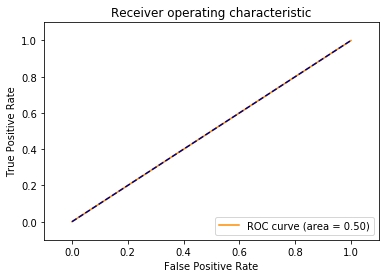

The confusion matrix of test dataset:
		| predicted Benign	| predicted Malignant
real Benign	| 77			| 0
real Malignant	| 37			| 0

The ROC curve for test dataset is as follows:


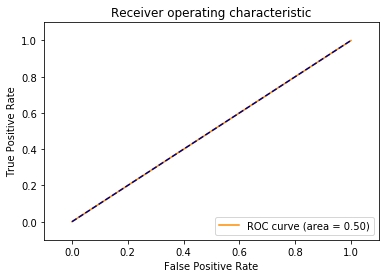

,AUC,Accuracy,F1,Precision,Recall
sl_training,0.5,0.629670,0.772714,0.629670,1.0
sl_test,0.5,0.618421,0.763490,0.618421,1.0


In [4]:
#1b i Supervised Learning
sl_train_acc = []
sl_train_prec = []
sl_train_recall = []
sl_train_f1 = []
sl_train_auc = []

sl_test_acc = []
sl_test_prec = []
sl_test_recall = []
sl_test_f1 = []
sl_test_auc = []

def sl_modeling(X_train,y_train):
    sl_score = {}
    for lamda in penalties:
        sl_model = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=lamda)
        score = cross_val_score(sl_model, X_train, y_train, cv=5)
        sl_score[lamda] = np.mean(score)
    opt_param = min(sl_score,key=sl_score.get)
    return opt_param

def sl_classifier(X_train, X_test, y_train, y_test, flag):
    # train model
    opt_lamda = sl_modeling(X_train,y_train)
    clf = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_lamda)
    sl_model = CalibratedClassifierCV(clf)
    sl_model.fit(X_train,y_train)
    print("The optimal penalty = %.5f" %opt_lamda)
    
    # train dataset
    y_train_pred = sl_model.predict(X_train)
    y_train_prob = sl_model.predict_proba(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    sl_train_acc.append(acc_train)
    prec_train = precision_score(y_train, y_train_pred)
    sl_train_prec.append(prec_train)
    recall_train = recall_score(y_train, y_train_pred)
    sl_train_recall.append(recall_train)
    f1_train = f1_score(y_train, y_train_pred)
    sl_train_f1.append(f1_train)
    auc_train = roc_auc_score(y_train,y_train_prob[:,0])
    sl_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    y_test_pred = sl_model.predict(X_test)
    y_test_prob = sl_model.predict_proba(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    sl_test_acc.append(acc_test)
    prec_test = precision_score(y_test, y_test_pred)
    sl_test_prec.append(prec_test)
    recall_test = recall_score(y_test, y_test_pred)
    sl_test_recall.append(recall_test)
    f1_test = f1_score(y_test, y_test_pred)
    sl_test_f1.append(f1_test)
    auc_test = roc_auc_score(y_test,y_test_prob[:,0])
    sl_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        #training        
        print("\nThe confusion matrix of training dataset:")
        conf_mtx(y_train, y_train_pred)
        
        #ROC
        print("\nThe ROC curve for training dataset is as follows:")
        draw_roc(y_train, y_train_prob[:,0])
        
        #test      
        print("The confusion matrix of test dataset:")
        conf_mtx(y_test, y_test_pred)
        
        #ROC
        print("\nThe ROC curve for test dataset is as follows:")
        draw_roc(y_test, y_test_prob[:,0])
        
        
def sl_monte():
    train_metrics = {}
    test_metrics = {}
    for i in range(0,M):
        print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
        X_train, X_test, y_train, y_test = train_test_split(input_data.drop([1], axis=1), input_data.loc[:,[1]], test_size = 0.2)
        nor_X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
        if i != M - 1:
            sl_classifier(nor_X_train, X_test, y_train, y_test, False)
        else:
            sl_classifier(nor_X_train, X_test, y_train, y_test, True)
    train_metrics["Accuracy"] = np.mean(sl_train_acc)
    train_metrics["Precision"] = np.mean(sl_train_prec)
    train_metrics["Recall"] = np.mean(sl_train_recall)
    train_metrics["F1"] = np.mean(sl_train_f1)
    train_metrics["AUC"] = np.mean(sl_train_auc)
    
    test_metrics["Accuracy"] = np.mean(sl_test_acc)
    test_metrics["Precision"] = np.mean(sl_test_prec)
    test_metrics["Recall"] = np.mean(sl_test_recall)
    test_metrics["F1"] = np.mean(sl_test_f1)
    test_metrics["AUC"] = np.mean(sl_test_auc)
    
    sl_metrics = pd.DataFrame([train_metrics,test_metrics],index=["sl_training","sl_test"])
    return sl_metrics   

sl_metrics = sl_monte()
sl_metrics

### 2.2 Semi-Supervised Learning/ Self-training (1b ii)


The No.1 experiment in Monte-Carlo:
The optimal penalty = 0.10000
For training dataset, accuracy = 0.763, precision = 0.989, recall = 0.632, F1 score = 0.771, AUC = 0.019
For test dataset, accuracy = 0.395, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.036

The No.2 experiment in Monte-Carlo:
The optimal penalty = 0.10000
For training dataset, accuracy = 0.848, precision = 0.991, recall = 0.767, F1 score = 0.864, AUC = 0.010
For test dataset, accuracy = 0.386, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.954

The No.3 experiment in Monte-Carlo:
The optimal penalty = 100.00000
For training dataset, accuracy = 0.831, precision = 0.986, recall = 0.737, F1 score = 0.843, AUC = 0.018
For test dataset, accuracy = 0.333, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.296

The No.4 experiment in Monte-Carlo:
The optimal penalty = 10.00000
For training dataset, accuracy = 0.752, precision = 1.000, recall = 0.613, F1 score = 0.760, AUC = 0.014
For te

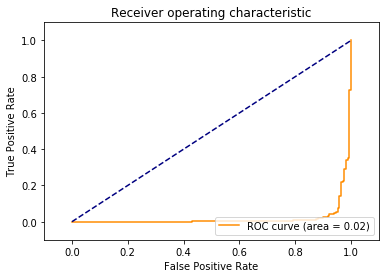

The confusion matrix of test dataset:
		| predicted Benign	| predicted Malignant
real Benign	| 0			| 69
real Malignant	| 0			| 45

The ROC curve for test dataset is as follows:


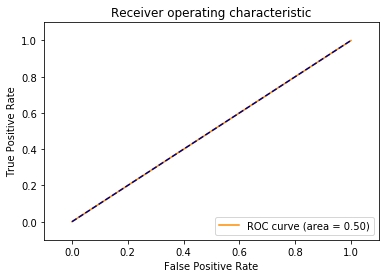

,AUC,Accuracy,F1,Precision,Recall
semi_training,0.113282,0.723590,0.660482,0.791686,0.568843
semi_test,0.438900,0.401754,0.025948,0.021242,0.033333


In [5]:
#1b ii Semi-Supervised Learning
semi_train_acc = []
semi_train_prec = []
semi_train_recall = []
semi_train_f1 = []
semi_train_auc = []

semi_test_acc = []
semi_test_prec = []
semi_test_recall = []
semi_test_f1 = []
semi_test_auc = []

def semi_modeling(X_train,y_train):
    semi_score = {}
    for lamda in penalties:
        semi_model = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=lamda)
        score = cross_val_score(semi_model, X_train, y_train, cv=5)
        semi_score[lamda] = np.mean(score)
    opt_param = min(semi_score,key=semi_score.get)
    return opt_param

def labeling(X_train,y_train):
    newX = X_train.copy()
    newX['class'] = y_train
    cl_1 = newX[newX['class'] == 1]
    cl_0 = newX[newX['class'] == 0]
    X1_label, X1_unlabel, y1_label, y1_unlabel = train_test_split(cl_1.drop(['class'], axis=1), cl_1['class'], test_size = 0.5,random_state=None)
    X0_label, X0_unlabel, y0_label, y0_unlabel = train_test_split(cl_0.drop(['class'], axis=1), cl_0['class'], test_size = 0.5,random_state=None)
    X_label = pd.concat([X1_label, X0_label])
    y_label = pd.concat([y1_label, y0_label])
    X_unlabel = pd.concat([X1_unlabel, X0_unlabel])
    y_unlabel = pd.concat([y1_unlabel, y0_unlabel])
    return X_label, X_unlabel, y_label, y_unlabel

def semi_classifier(X_train, X_test, y_train, y_test, flag):
    X_label, X_unlabel, y_label, y_unlabel = labeling(X_train, y_train)
    # train model 
    opt_lamda = 0
    while not(X_unlabel.empty):
        opt_lamda = semi_modeling(X_label,y_label)
        semi_model = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_lamda)
        semi_model.fit(X_label,y_label)
        
        dists = np.absolute(semi_model.decision_function(X_unlabel))
        indices = X_unlabel.index.tolist()
        pos_dists = dict(zip(indices,dists))
        index = max(pos_dists,key=pos_dists.get)
        X_label = pd.concat([X_label, pd.DataFrame(X_unlabel.loc[[index],:])])
        y_label = pd.concat([y_label, pd.DataFrame(semi_model.predict(X_unlabel.loc[[index],:]))])
        X_unlabel = X_unlabel.drop([index])
        
    print("The optimal penalty = %.5f" %opt_lamda)
    
    clf = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_lamda)
    semi_model = CalibratedClassifierCV(clf,cv=5)
    semi_model.fit(X_label,y_label)
     
    # train dataset
    y_train_pred = semi_model.predict(X_train)
    y_train_prob = semi_model.predict_proba(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    semi_train_acc.append(acc_train)
    prec_train = precision_score(y_train, y_train_pred)
    semi_train_prec.append(prec_train)
    recall_train = recall_score(y_train, y_train_pred)
    semi_train_recall.append(recall_train)
    f1_train = f1_score(y_train, y_train_pred)
    semi_train_f1.append(f1_train)
    auc_train = roc_auc_score(y_train,y_train_prob[:,0])
    semi_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    y_test_pred = semi_model.predict(X_test)
    y_test_prob = semi_model.predict_proba(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    semi_test_acc.append(acc_test)
    prec_test = precision_score(y_test, y_test_pred)
    semi_test_prec.append(prec_test)
    recall_test = recall_score(y_test, y_test_pred)
    semi_test_recall.append(recall_test)
    f1_test = f1_score(y_test, y_test_pred)
    semi_test_f1.append(f1_test)
    auc_test = roc_auc_score(y_test,y_test_prob[:,0])
    semi_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        #training        
        print("\nThe confusion matrix of training dataset:")
        conf_mtx(y_train, y_train_pred)
        
        #ROC
        print("\nThe ROC curve for training dataset is as follows:")
        draw_roc(y_train, y_train_prob[:,0])
        
        #test      
        print("The confusion matrix of test dataset:")
        conf_mtx(y_test, y_test_pred)
        
        #ROC
        print("\nThe ROC curve for test dataset is as follows:")
        draw_roc(y_test, y_test_prob[:,0])     
        
def semi_monte():
    train_metrics = {}
    test_metrics = {}
    for i in range(0,M):
        print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
        X_train, X_test, y_train, y_test = train_test_split(input_data.drop([1], axis=1), input_data.loc[:,[1]], test_size = 0.2)
        nor_X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
        if i != M - 1:
            semi_classifier(nor_X_train, X_test, y_train, y_test, False)
        else:
            semi_classifier(nor_X_train, X_test, y_train, y_test, True)
    train_metrics["Accuracy"] = np.mean(semi_train_acc)
    train_metrics["Precision"] = np.mean(semi_train_prec)
    train_metrics["Recall"] = np.mean(semi_train_recall)
    train_metrics["F1"] = np.mean(semi_train_f1)
    train_metrics["AUC"] = np.mean(semi_train_auc)
    
    test_metrics["Accuracy"] = np.mean(semi_test_acc)
    test_metrics["Precision"] = np.mean(semi_test_prec)
    test_metrics["Recall"] = np.mean(semi_test_recall)
    test_metrics["F1"] = np.mean(semi_test_f1)
    test_metrics["AUC"] = np.mean(semi_test_auc)
    
    semi_metrics = pd.DataFrame([train_metrics,test_metrics],index=["semi_training","semi_test"])
    return semi_metrics   

semi_metrics = semi_monte()
semi_metrics

### 2.3 Unsupervised Learning (1b iii)
   To minimize the possibility of getting the local minimum, we would like to run K-Means several times to get the best model. And it has been realized in KMeans library in sklearn.


The No.1 experiment in Monte-Carlo:
For training dataset, accuracy = 0.983, precision = 0.967, recall = 1.000, F1 score = 0.983, AUC = 0.984
For test dataset, accuracy = 0.816, precision = 0.750, recall = 1.000, F1 score = 0.857, AUC = 0.794

The No.2 experiment in Monte-Carlo:
For training dataset, accuracy = 0.983, precision = 0.967, recall = 1.000, F1 score = 0.983, AUC = 0.984
For test dataset, accuracy = 0.877, precision = 0.841, recall = 1.000, F1 score = 0.914, AUC = 0.825

The No.3 experiment in Monte-Carlo:
For training dataset, accuracy = 0.983, precision = 0.967, recall = 1.000, F1 score = 0.983, AUC = 0.984
For test dataset, accuracy = 0.851, precision = 0.823, recall = 1.000, F1 score = 0.903, AUC = 0.757

The No.4 experiment in Monte-Carlo:
For training dataset, accuracy = 0.000, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.000
For test dataset, accuracy = 0.842, precision = 0.793, recall = 1.000, F1 score = 0.885, AUC = 0.800

The No.5 experiment in Mont

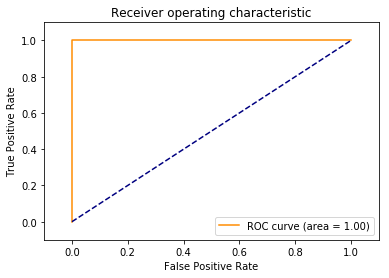

The confusion matrix of test dataset:
		| predicted Benign	| predicted Malignant
real Benign	| 0			| 81
real Malignant	| 22			| 11

The ROC curve for test dataset is as follows:


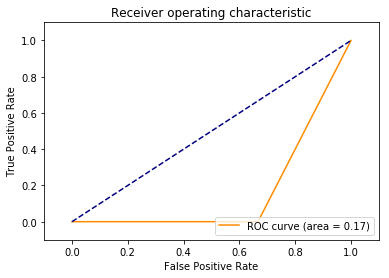

,AUC,Accuracy,F1,Precision,Recall
unsl_training,0.629570,0.629444,0.624859,0.616667,0.633333
unsl_test,0.546581,0.549123,0.511447,0.468499,0.566640


In [6]:
#1b iii Unsupervised Learning
unsl_train_acc = []
unsl_train_prec = []
unsl_train_recall = []
unsl_train_f1 = []
unsl_train_auc = []

unsl_test_acc = []
unsl_test_prec = []
unsl_test_recall = []
unsl_test_f1 = []
unsl_test_auc = []

def unsl_classifier(X_train, X_test, y_train, y_test, flag):
    # train model
    kMeans_model = KMeans(n_clusters=2,init='random',n_init=100).fit(X_train)

    # train dataset
    indices_train = y_train.index.tolist()
    y_train_pred = pd.DataFrame(kMeans_model.labels_, index=y_train.index)
    dists_train = kMeans_model.fit_transform(X_train)
    
    class_1_dists_train = dict(zip(indices_train,dists_train[:,1]))
    class_1_idx = heapq.nsmallest(number_of_points,class_1_dists_train,key=class_1_dists_train.get)
    cluster_1 = y_train_pred.loc[class_1_idx][0].value_counts().index[0]
    y_train_1_truelist = y_train.loc[class_1_idx]
    y_train_1_prelist = pd.DataFrame([cluster_1] * number_of_points, index = y_train_1_truelist.index)
    
    class_0_dists_train = dict(zip(indices_train,dists_train[:,0]))
    class_0_idx = heapq.nsmallest(number_of_points,class_0_dists_train,key=class_0_dists_train.get)
    cluster_0 = y_train_pred.loc[class_0_idx][0].value_counts().index[0]
    y_train_0_truelist = y_train.loc[class_0_idx]
    y_train_0_prelist = pd.DataFrame([cluster_0] * number_of_points, index = y_train_0_truelist.index)
    
    y_train_truelist = pd.concat([y_train_0_truelist,y_train_1_truelist])
    y_train_prelist = pd.concat([y_train_0_prelist,y_train_1_prelist])
    
    acc_train = accuracy_score(y_train_truelist, y_train_prelist)
    unsl_train_acc.append(acc_train)
    prec_train = precision_score(y_train_truelist, y_train_prelist)
    unsl_train_prec.append(prec_train)
    recall_train = recall_score(y_train_truelist, y_train_prelist)
    unsl_train_recall.append(recall_train)
    f1_train = f1_score(y_train_truelist, y_train_prelist)
    unsl_train_f1.append(f1_train)
    auc_train = roc_auc_score(y_train_truelist, y_train_prelist)
    unsl_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    y_test_pred = kMeans_model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    unsl_test_acc.append(acc_test)
    prec_test = precision_score(y_test, y_test_pred)
    unsl_test_prec.append(prec_test)
    recall_test = recall_score(y_test, y_test_pred)
    unsl_test_recall.append(recall_test)
    f1_test = f1_score(y_test, y_test_pred)
    unsl_test_f1.append(f1_test)
    auc_test = roc_auc_score(y_test,y_test_pred)
    unsl_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        #training        
        print("\nThe confusion matrix of training dataset:")
        conf_mtx(y_train_truelist, y_train_prelist)
        
        #ROC
        print("\nThe ROC curve for training dataset is as follows:")
        draw_roc(y_train_truelist, y_train_prelist)
        
        #test      
        print("The confusion matrix of test dataset:")
        conf_mtx(y_test, y_test_pred)
        
        #ROC
        print("\nThe ROC curve for test dataset is as follows:")
        draw_roc(y_test, y_test_pred)  
        
def unsl_monte():
    train_metrics = {}
    test_metrics = {}
    for i in range(0,M):
        print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
        X_train, X_test, y_train, y_test = train_test_split(input_data.drop([1], axis=1), input_data.loc[:,[1]], test_size = 0.2)
        if i != M - 1:
            unsl_classifier(X_train, X_test, y_train, y_test, False)
        else:
            unsl_classifier(X_train, X_test, y_train, y_test, True)
    train_metrics["Accuracy"] = np.mean(unsl_train_acc)
    train_metrics["Precision"] = np.mean(unsl_train_prec)
    train_metrics["Recall"] = np.mean(unsl_train_recall)
    train_metrics["F1"] = np.mean(unsl_train_f1)
    train_metrics["AUC"] = np.mean(unsl_train_auc)
    
    test_metrics["Accuracy"] = np.mean(unsl_test_acc)
    test_metrics["Precision"] = np.mean(unsl_test_prec)
    test_metrics["Recall"] = np.mean(unsl_test_recall)
    test_metrics["F1"] = np.mean(unsl_test_f1)
    test_metrics["AUC"] = np.mean(unsl_test_auc)
    
    unsl_metrics = pd.DataFrame([train_metrics,test_metrics],index=["unsl_training","unsl_test"])
    return unsl_metrics   

unsl_metrics = unsl_monte()
unsl_metrics

### 2.4 Spectral Clustering (1b iv)


The No.1 experiment in Monte-Carlo:
For training dataset, accuracy = 0.500, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500
For test dataset, accuracy = 0.412, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.2 experiment in Monte-Carlo:
For training dataset, accuracy = 0.517, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500
For test dataset, accuracy = 0.342, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.476

The No.3 experiment in Monte-Carlo:
For training dataset, accuracy = 0.517, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500
For test dataset, accuracy = 0.351, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.4 experiment in Monte-Carlo:
For training dataset, accuracy = 0.517, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500
For test dataset, accuracy = 0.395, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.5 experiment in Mont

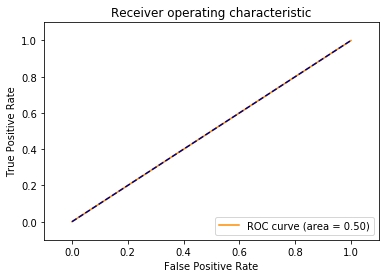

The confusion matrix of test dataset:
		| predicted Benign	| predicted Malignant
real Benign	| 1			| 62
real Malignant	| 1			| 50

The ROC curve for test dataset is as follows:


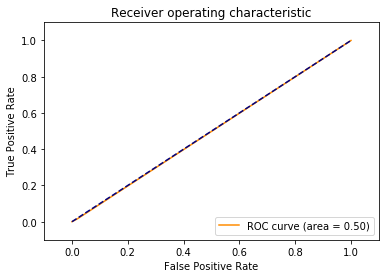

,AUC,Accuracy,F1,Precision,Recall
spec_training,0.500000,0.508889,0.000000,0.000000,0.000000
spec_test,0.495649,0.381871,0.001026,0.016667,0.000529


In [8]:
#1b iv Spectral Clustering
from sklearn.manifold import SpectralEmbedding

spec_train_acc = []
spec_train_prec = []
spec_train_recall = []
spec_train_f1 = []
spec_train_auc = []

spec_test_acc = []
spec_test_prec = []
spec_test_recall = []
spec_test_f1 = []
spec_test_auc = []

gammas = np.linspace(0.00001,1,10)

def spec_modeling(X_train,y_train):
    spec_score = {}
    for gamma in gammas:
        embedding = SpectralEmbedding(n_components=2, gamma = gamma, affinity="rbf")
        X_trans_train = embedding.fit_transform(X_train)
        kMeans_model = KMeans(n_clusters=2,n_init=10).fit(X_trans_train)
        labels = kMeans_model.labels_
        
        class_1_true = y_train[y_train[1] == 1].shape[0]
        class_0_true = y_train[y_train[1] == 0].shape[0]
        ratio_true = class_0_true / class_1_true
        
        counts = pd.value_counts(labels)
        ratio_pred = counts[0] / counts[1]
        
        spec_score[gamma] = abs(ratio_true - ratio_pred)
    opt_param = min(spec_score,key=spec_score.get)
    return opt_param

def spec_classifier(X_train, X_test, y_train, y_test, flag):
    # train model
    #opt_gamma = spec_modeling(X_train,y_train)
    embedding = SpectralEmbedding(n_components=2,affinity="rbf")
    X_trans_train = embedding.fit_transform(X_train)
    X_trans_test = embedding.fit_transform(X_test)
    kMeans_model = KMeans(n_clusters=2,n_init=10).fit(X_trans_train)
    y_labels = kMeans_model.labels_
    y_test_pred = kMeans_model.predict(X_trans_test)
    
    # train dataset
    indices_train = y_train.index.tolist()
    y_train_pred = pd.DataFrame(y_labels, index=y_train.index)
    dists_train = kMeans_model.fit_transform(X_train)
    
    class_1_dists_train = dict(zip(indices_train,dists_train[:,1]))
    class_1_idx = heapq.nsmallest(number_of_points,class_1_dists_train,key=class_1_dists_train.get)
    cluster_1 = y_train_pred.loc[class_1_idx][0].value_counts().index[0]
    y_train_1_truelist = y_train.loc[class_1_idx]
    y_train_1_prelist = pd.DataFrame([cluster_1] * number_of_points, index = y_train_1_truelist.index)
    
    class_0_dists_train = dict(zip(indices_train,dists_train[:,0]))
    class_0_idx = heapq.nsmallest(number_of_points,class_0_dists_train,key=class_0_dists_train.get)
    cluster_0 = y_train_pred.loc[class_0_idx][0].value_counts().index[0]
    y_train_0_truelist = y_train.loc[class_0_idx]
    y_train_0_prelist = pd.DataFrame([cluster_0] * number_of_points, index = y_train_0_truelist.index)
    
    y_train_truelist = pd.concat([y_train_0_truelist,y_train_1_truelist])
    y_train_prelist = pd.concat([y_train_0_prelist,y_train_1_prelist])
    
    acc_train = accuracy_score(y_train_truelist, y_train_prelist)
    spec_train_acc.append(acc_train)
    prec_train = precision_score(y_train_truelist, y_train_prelist)
    spec_train_prec.append(prec_train)
    recall_train = recall_score(y_train_truelist, y_train_prelist)
    spec_train_recall.append(recall_train)
    f1_train = f1_score(y_train_truelist, y_train_prelist)
    spec_train_f1.append(f1_train)
    auc_train = roc_auc_score(y_train_truelist, y_train_prelist)
    spec_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    acc_test = accuracy_score(y_test, y_test_pred)
    spec_test_acc.append(acc_test)
    prec_test = precision_score(y_test, y_test_pred)
    spec_test_prec.append(prec_test)
    recall_test = recall_score(y_test, y_test_pred)
    spec_test_recall.append(recall_test)
    f1_test = f1_score(y_test, y_test_pred)
    spec_test_f1.append(f1_test)
    auc_test = roc_auc_score(y_test,y_test_pred)
    spec_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        #training        
        print("\nThe confusion matrix of training dataset:")
        conf_mtx(y_train_truelist, y_train_prelist)
        
        #ROC
        print("\nThe ROC curve for training dataset is as follows:")
        draw_roc(y_train_truelist, y_train_prelist)
        
        #test      
        print("The confusion matrix of test dataset:")
        conf_mtx(y_test, y_test_pred)
        
        #ROC
        print("\nThe ROC curve for test dataset is as follows:")
        draw_roc(y_test, y_test_pred)  
        
def spec_monte():
    train_metrics = {}
    test_metrics = {}
    for i in range(0,M):
        print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
        X_train, X_test, y_train, y_test = train_test_split(input_data.drop([1], axis=1), input_data.loc[:,[1]], test_size = 0.2)
        if i != M - 1:
            spec_classifier(X_train, X_test, y_train, y_test, False)
        else:
            spec_classifier(X_train, X_test, y_train, y_test, True)
    train_metrics["Accuracy"] = np.mean(spec_train_acc)
    train_metrics["Precision"] = np.mean(spec_train_prec)
    train_metrics["Recall"] = np.mean(spec_train_recall)
    train_metrics["F1"] = np.mean(spec_train_f1)
    train_metrics["AUC"] = np.mean(spec_train_auc)
    
    test_metrics["Accuracy"] = np.mean(spec_test_acc)
    test_metrics["Precision"] = np.mean(spec_test_prec)
    test_metrics["Recall"] = np.mean(spec_test_recall)
    test_metrics["F1"] = np.mean(spec_test_f1)
    test_metrics["AUC"] = np.mean(spec_test_auc)
    
    spec_metrics = pd.DataFrame([train_metrics,test_metrics],index=["spec_training","spec_test"])
    return spec_metrics   

spec_metrics = spec_monte()
spec_metrics

In [9]:
metrics = pd.concat([sl_metrics, semi_metrics, unsl_metrics, spec_metrics])
metrics

,AUC,Accuracy,F1,Precision,Recall
sl_training,0.500000,0.629670,0.772714,0.629670,1.000000
sl_test,0.500000,0.618421,0.763490,0.618421,1.000000
semi_training,0.113282,0.723590,0.660482,0.791686,0.568843
semi_test,0.438900,0.401754,0.025948,0.021242,0.033333
unsl_training,0.629570,0.629444,0.624859,0.616667,0.633333
unsl_test,0.546581,0.549123,0.511447,0.468499,0.566640
spec_training,0.500000,0.508889,0.000000,0.000000,0.000000
spec_test,0.495649,0.381871,0.001026,0.016667,0.000529


### Summary
From above four models, we can find that supervised learning perform best among four based on five metrics.The semi supervised learning tend to overfit the model sometimes and might be variant at each simulation, so the peformance of model for test dataset is not as good as that for training dataset. The unsupervised learning is unstable in each simulation, and the result varies in a large range due to the disadvantage of k-means, which might cause local optimization. So the model might underperform in such situations.